In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import os

In [2]:

arrivals_df=pd.read_csv('monthly1971-2020.csv',index_col='Month')
arrivals_df.head()


,Arrivals,Monthly_covid_cases,Terrorist_Attack_death
Month,,,
1971-01,5931,0,0
1971-02,6570,0,0
1971-03,5166,0,0
1971-04,1539,0,0
1971-05,952,0,0


In [3]:
arrivals_df.describe()

,Arrivals,Monthly_covid_cases,Terrorist_Attack_death
count,621.000000,6.210000e+02,621.000000
mean,46301.677939,2.203570e+04,4.380032
std,50866.557791,2.166843e+05,37.034864
min,0.000000,0.000000e+00,0.000000
25%,17220.000000,0.000000e+00,0.000000
50%,30672.000000,0.000000e+00,0.000000
75%,45102.000000,0.000000e+00,0.000000
max,253169.000000,2.908147e+06,774.000000


In [5]:
arrivals_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 621 entries, 1971-01 to 2022-09
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Arrivals                621 non-null    int64
 1   Monthly_covid_cases     621 non-null    int64
 2   Terrorist_Attack_death  621 non-null    int64
dtypes: int64(3)
memory usage: 19.4+ KB


Text(0.5, 1.0, '')

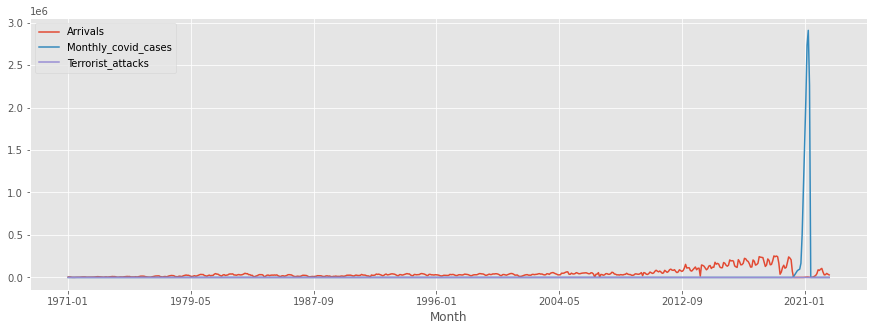

In [5]:
fig,ax=plt.subplots(figsize=(15,5))
arrivals_df.plot(ax=ax)
ax.legend(['Arrivals','Monthly_covid_cases','Terrorist_attacks'])
plt.title("")

Text(0.5, 1.0, 'Actual Arrivals between 1971 and 2022')

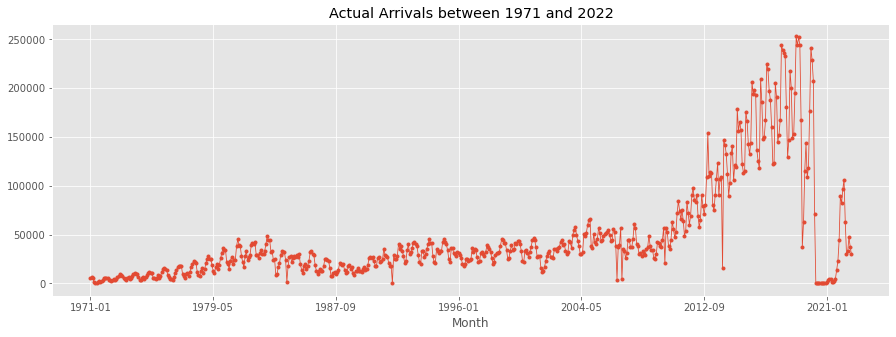

In [6]:
#plotting arrivals 
fig,ax=plt.subplots(figsize=(15,5))
arrivals_df['Arrivals'].plot(linewidth=0.8,marker='.')
plt.title("Actual Arrivals between 1971 and 2022")

,Arrivals,Monthly_covid_cases,Terrorist_Attack_death
Month,,,
1971-01,5931,0,0
1971-02,6570,0,0
1971-03,5166,0,0
1971-04,1539,0,0
1971-05,952,0,0
...,...,...,...
2009-01,38468,0,0
2009-02,34169,0,0
2009-03,34065,0,14


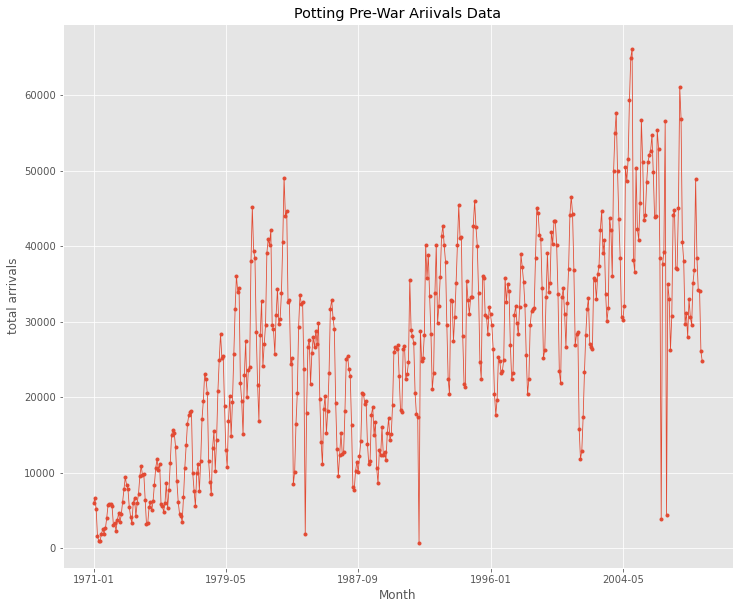

In [7]:
# arrivals show a rapid growth after may of 2009 (end of civil war in sri lanka)
# therefore need to seperate the pre-war error and post-war error to make successful forecast
# a rapid drop in arrivals can be seen after January 2020 (due to COVID-19 pandemic)
# need to remove tail portion as well to make a successful prediction
#Dropping data that cause anomolies
#extracting and plotting pre-war arrivals data
pre_war_df= arrivals_df.loc[arrivals_df.index <= "2009-05"]
plt.figure(figsize=(12,10))
plt.ylabel("total arrivals")
pre_war_df['Arrivals'].plot(linewidth=0.8,marker='.')
plt.title("Potting Pre-War Ariivals Data")
pre_war_df

,Arrivals,Monthly_covid_cases,Terrorist_Attack_death
Month,,,
2009-06,30234,0,0
2009-07,42223,0,0
2009-08,41207,0,0
2009-09,37983,0,0
2009-10,37575,0,0
...,...,...,...
2022-05,30207,0,0
2022-06,32856,0,0
2022-07,47290,0,0


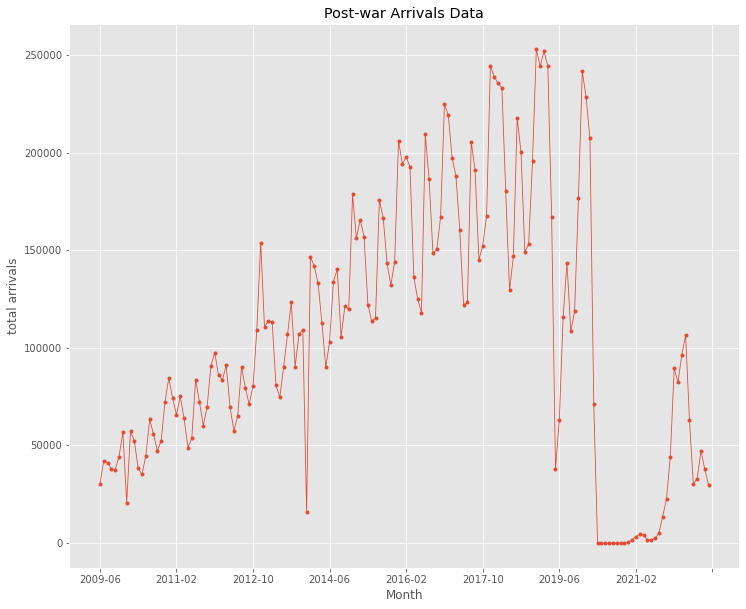

In [9]:
#extracting and plotting post war arrivals data
post_war_df=arrivals_df.loc[arrivals_df.index > "2009-05"]
plt.figure(figsize=(12,10))
post_war_df['Arrivals'].plot(linewidth=0.8,marker='.')
plt.ylabel("total arrivals")
plt.title("Post-war Arrivals Data")
post_war_df


,Arrivals,Monthly_covid_cases,Terrorist_Attack_death
Month,,,
2009-06,30234,0,0
2009-07,42223,0,0
2009-08,41207,0,0
2009-09,37983,0,0
2009-10,37575,0,0
...,...,...,...
2019-09,108575,0,0
2019-10,118743,0,0
2019-11,176984,0,0


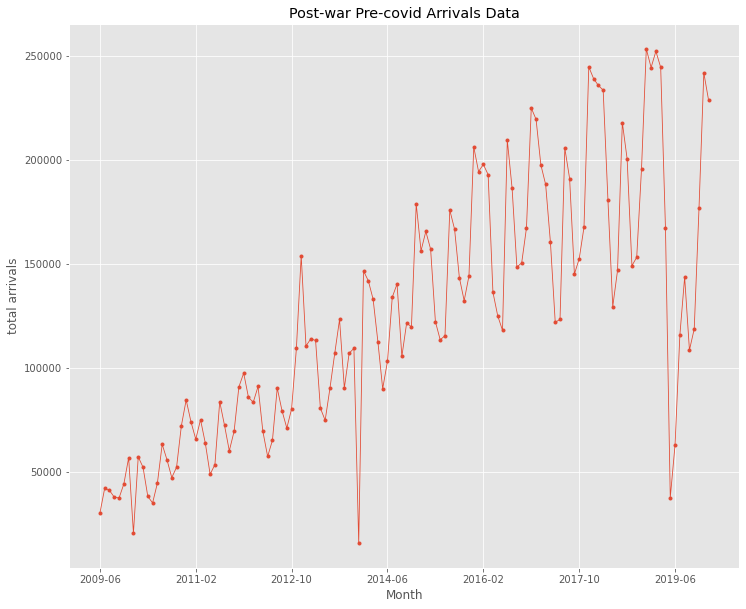

In [10]:
#extracting and plotting post-war-pre-covid arrivals data
post_war_pre_covid_df= post_war_df.loc[post_war_df.index <= "2020-01"]
plt.figure(figsize=(12,10))
post_war_pre_covid_df['Arrivals'].plot(linewidth=0.8,marker='.')
plt.ylabel("total arrivals")
plt.title("Post-war Pre-covid Arrivals Data")
post_war_pre_covid_df

## Running tests to check for stationarity in data (post-war-pre-covid)

In [11]:
#defining AD Fuller test 
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [12]:
    #defining kpss test
    from statsmodels.tsa.stattools import kpss
    #define KPSS
    def kpss_test(timeseries):
        print ('Results of KPSS Test:')
        kpsstest = kpss(timeseries, regression='c')
        kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
        for key,value in kpsstest[3].items():
            kpss_output['Critical Value (%s)'%key] = value
        return kpss_output

In [13]:
#running ADF test for post-war-pre-covid data
adf_test(post_war_pre_covid_df['Arrivals'])

1. ADF :  -1.7790420657078614
2. P-Value :  0.3909152400258986
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression: 114
5. Critical Values :
	 1% :  -3.489057523907491
	 5% :  -2.887246327182993
	 10% :  -2.5804808802708528


ADF value is greater than any critical value. P value is greater than 0.05. Data is non-stationary

In [14]:
#running kpss test for post-war-pre-covid-data
print (kpss_test(post_war_pre_covid_df['Arrivals']))

Results of KPSS Test:
Test Statistic           1.713628
p-value                  0.010000
Lags Used                6.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


KPSS test returns a test statistic greater than any critical value. P value is less than 0.05. Therefore data is non-stationary

C:\Users\DELL\AppData\Local\Temp/ipykernel_10600/3798085094.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_war_pre_covid_df['Arrivals_diff'] = post_war_pre_covid_df['Arrivals'] - post_war_pre_covid_df['Arrivals'].shift(1)
C:\Users\DELL\AppData\Local\Temp/ipykernel_10600/3798085094.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_war_pre_covid_df.dropna(inplace=True)


Text(0.5, 1.0, 'After applying differencing to data')

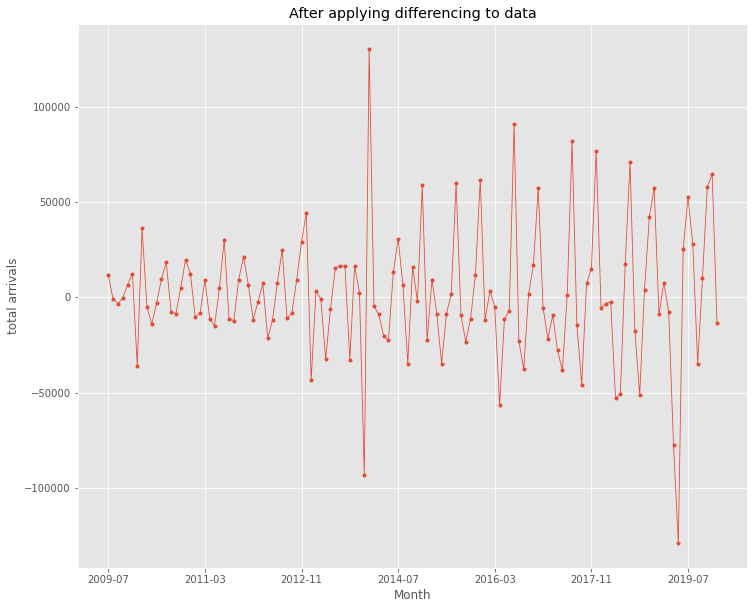

In [15]:
#Making data stationary by differencing (removing temporal dependence)
#applying differencing to data
post_war_pre_covid_df['Arrivals_diff'] = post_war_pre_covid_df['Arrivals'] - post_war_pre_covid_df['Arrivals'].shift(1)
post_war_pre_covid_df.dropna(inplace=True)
plt.figure(figsize=(12,10))
post_war_pre_covid_df['Arrivals_diff'].plot(linewidth=0.8,marker='.')
plt.ylabel("total arrivals")
plt.title("After applying differencing to data")

In [16]:
#checking if data is stationary after differencing using AD Fuller and KPSS tests
#running ADF test for post-war-pre-covid data
print("AD Fuller test report for differenced data")
print(adf_test(post_war_pre_covid_df['Arrivals_diff']))
print('-------------------------------------')
print("KPSS test report for differenced data")
print(kpss_test(post_war_pre_covid_df['Arrivals']))


AD Fuller test report for differenced data
1. ADF :  -3.7016382863853656
2. P-Value :  0.004090169098975276
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 114
5. Critical Values :
	 1% :  -3.489057523907491
	 5% :  -2.887246327182993
	 10% :  -2.5804808802708528
None
-------------------------------------
KPSS test report for differenced data
Results of KPSS Test:
Test Statistic           1.69277
p-value                  0.01000
Lags Used                6.00000
Critical Value (10%)     0.34700
Critical Value (5%)      0.46300
Critical Value (2.5%)    0.57400
Critical Value (1%)      0.73900
dtype: float64


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [23]:
# stationarity has definitely improved as the ADF value is quite close 1% critical value
# P value is also less than 0.05 

In [21]:
#However KPSS test still shows non-stationarity in data

# Normalization

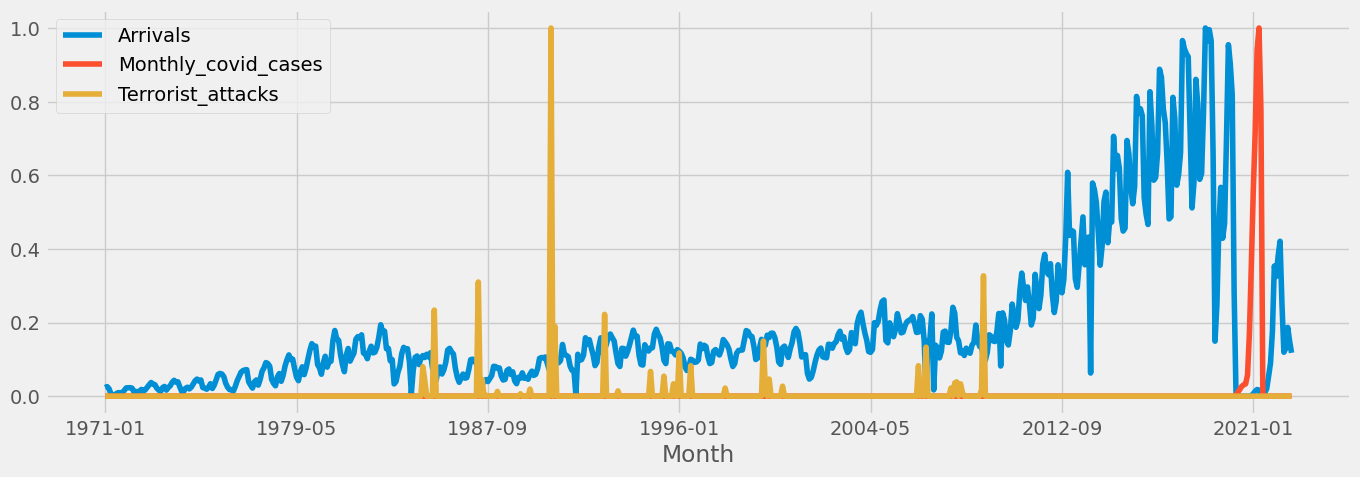

In [56]:
normalized_arrivals_df=arrivals_df.copy()

normalized_arrivals_df['Arrivals']=(arrivals_df['Arrivals']/max(arrivals_df['Arrivals']))
normalized_arrivals_df['Monthly_covid_cases']=(arrivals_df['Monthly_covid_cases']/max(arrivals_df['Monthly_covid_cases']))
normalized_arrivals_df['Terrorist_Attack_death']=(arrivals_df['Terrorist_Attack_death']/max(arrivals_df['Terrorist_Attack_death']))
# ormalized_df=(df-df.min())/(df.max()-df.min())

#after normalization
fig,ax=plt.subplots(figsize=(15,5))
normalized_arrivals_df['Arrivals'].plot(ax=ax)
normalized_arrivals_df['Monthly_covid_cases'].plot(ax=ax)
normalized_arrivals_df['Terrorist_Attack_death'].plot(ax=ax)
ax.legend(['Arrivals','Monthly_covid_cases','Terrorist_attacks'])

In [57]:

adf_test(normalized_arrivals_df['Arrivals'])

1. ADF :  -2.337359048441541
2. P-Value :  0.16020179693758962
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression: 606
5. Critical Values :
	 1% :  -3.4411869900487906
	 5% :  -2.866321181236609
	 10% :  -2.569316262893616


In [22]:
sns.pairplot(normalized_arrivals_df)


NameError: name 'normalized_arrivals_df' is not defined

## Decision Tree Regressor (Multivariate Data)

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [60]:
X = normalized_arrivals_df[['Monthly_covid_cases','Terrorist_Attack_death']]
y = normalized_arrivals_df['Arrivals'] # Target variable

In [61]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44) # 70% training and 30% test

In [62]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor() 
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [63]:
y_pred = dtr.predict(X_test)



In [64]:
df3=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df3

,Actual,Predicted
Month,,
1994-07,0.139709,0.190197
1997-05,0.088506,0.190197
2013-11,0.432201,0.190197
1994-04,0.110914,0.190197
1993-03,0.149912,0.190197
...,...,...
2020-05,0.000000,0.000000
2021-02,0.013295,0.006644
1987-06,0.030217,0.105029


<AxesSubplot:xlabel='Month'>

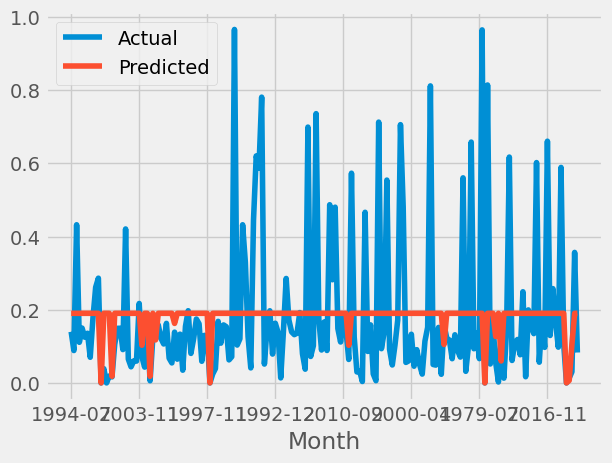

In [65]:
df3.plot()

In [66]:
from sklearn.metrics import r2_score 
R_square = r2_score(y_test, y_pred) 
print('Coefficient of Determination', R_square)

Coefficient of Determination 0.038455844601598566


In [67]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.13408667879932828
Mean Squared Error: 0.03867459405933749
Root Mean Squared Error: 0.1966585723006691


## XGboost

In [68]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

color_pal=sns.color_palette()
plt.style.use('fivethirtyeight')

In [69]:
reg=xgb.XGBRegressor(base_score=0.5,
                     booster='gbtree',
                     n_estimator=1000,
                     early_stopping_rounds=500,
                     objective='reg:linear',
                     max_depth=3,
                     learning_rate=0.01)
reg.fit(X_train,y_train,
       eval_set=[(X_train,y_train),(X_test,y_test)],
       verbose=100)


[09:59:09] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[09:59:09] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-rmse:0.37224	validation_1-rmse:0.37361
[99]	validation_0-rmse:0.23116	validation_1-rmse:0.22986


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=500, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimator=1000, n_estimators=100,
             n_jobs=0, num_parallel_tree=1, objective='reg:linear', ...)

In [70]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.13408667879932828
Mean Squared Error: 0.03867459405933749
Root Mean Squared Error: 0.1966585723006691
